In [1]:
import numpy as np
from scipy.spatial import ConvexHull,Delaunay
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Supposons un reseau simple : de type one_net d architecture 2 5 1
avec une activation relu : 2 5 (relu) 1 (relu)

In [5]:
W1 = np.array([[ 1.2067,  0.477 ],
        [-0.7744, -0.0382],
        [-0.0545, -0.2608],
        [-0.0246, -1.1567],
        [-0.1484,  1.0552],
        [-0.2904,  0.0486],
        [ 0.    , -0.    ],
        [ 0.5722,  0.0049],
        [ 0.2667, -0.6222],
        [-0.9105,  0.0039]])

W1.shape

(10, 2)

W1 = np.array([[ 1.1702000e+00,  1.9960000e-01],
        [-5.7159996e-01, -2.3000001e-03],
        [-5.4499999e-02, -2.6080000e-01],
        [-2.0999999e-03, -1.1590999e+00],
        [-2.1840000e-01,  9.8379999e-01],
        [-2.9040000e-01,  4.8599999e-02],
        [ 0.0000000e+00, -0.0000000e+00],
        [ 6.4330000e-01,  3.9999999e-04],
        [ 1.3880000e-01, -4.0649998e-01],
        [-8.2690001e-01, -1.0060000e-01]])

W1.shape

In [64]:
b1 = np.array([-9.900e-02, -1.314e-01, -6.615e-01, -2.732e-01, -3.065e-01,
        -6.375e-01, -2.000e-04, -1.839e-01, -4.500e-03, -6.556e-01]).reshape(-1,1)
b1.shape

(10,)

b1 = np.array([-1.6380000e-01, -2.7999999e-03, -6.6149998e-01, -3.4469998e-01,
        -2.8009999e-01, -6.3749999e-01, -1.9999999e-04, -2.6130000e-01,
         4.9999997e-04, -7.0989996e-01]).reshape(-1,1)
b1.shape

In [7]:
W2= np.array([[ 0.3919    ,  0.1595    ,  0.2631    ,  0.8702    ,  0.76049995,
         -0.2333    , -0.        ,  0.7443    ,  0.74729997,  1.7297    ]]).reshape(1,-1)
W2.shape

(1, 10)

#W2= np.array([-1,-2,0,1,3]).reshape(1,-1)
W2= np.array([[ 0.46289998,  0.0669    ,  0.2631    ,  1.2672    ,  1.1229    ,
         -0.2333    , -0.        ,  1.3639    ,  0.6024    ,  3.6285    ]]).reshape(1,-1)
W2.shape

In [8]:
b2 = np.array([-0.4005])
b2.shape

(1,)

#b2 = np.array([2])
b2 = np.array([-0.648])
b2.shape

In [9]:
def decompose(w):
    return (w+abs(w))/2,(-w+abs(w))/2
def G1(x):
    return decompose(W1)[1].dot(x)
def H1(x):
    return decompose(W1)[0].dot(x)+b1
def F1(x):
    return np.maximum(G1(x),H1(x))
def NU1(x):
    return F1(x)-G(x)

In [10]:
PG1 = np.concatenate((decompose(W1)[1],0*b1.reshape(-1,1)),axis=1)
PH1 = np.concatenate((decompose(W1)[0],b1.reshape(-1,1)),axis=1)
PF1 = np.stack((PG1,PH1),axis=1)

In [11]:
PF1,PF1.shape

(array([[[ 0.0000e+00,  0.0000e+00, -0.0000e+00],
         [ 1.2067e+00,  4.7700e-01, -9.9000e-02]],
 
        [[ 7.7440e-01,  3.8200e-02, -0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -1.3140e-01]],
 
        [[ 5.4500e-02,  2.6080e-01, -0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -6.6150e-01]],
 
        [[ 2.4600e-02,  1.1567e+00, -0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -2.7320e-01]],
 
        [[ 1.4840e-01,  0.0000e+00, -0.0000e+00],
         [ 0.0000e+00,  1.0552e+00, -3.0650e-01]],
 
        [[ 2.9040e-01,  0.0000e+00, -0.0000e+00],
         [ 0.0000e+00,  4.8600e-02, -6.3750e-01]],
 
        [[ 0.0000e+00,  0.0000e+00, -0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -2.0000e-04]],
 
        [[ 0.0000e+00,  0.0000e+00, -0.0000e+00],
         [ 5.7220e-01,  4.9000e-03, -1.8390e-01]],
 
        [[ 0.0000e+00,  6.2220e-01, -0.0000e+00],
         [ 2.6670e-01,  0.0000e+00, -4.5000e-03]],
 
        [[ 9.1050e-01,  0.0000e+00, -0.0000e+00],
         [ 0.0000e+00, 

In [12]:
H2_PF1 = np.zeros((5,2,3)) 
for i in range(5): 
    H2_PF1[i]= PF1[i] * decompose(W2)[1][0][i]
H2_PG1 = np.zeros((5,2,3)) 
for i in range(5): 
    H2_PG1[i]= PG1[i] * decompose(W2)[0][0][i]
G2_PF1 = np.zeros((5,2,3)) 
for i in range(5): 
    G2_PF1[i]= PF1[i] * decompose(W2)[0][0][i]
G2_PG1 = np.zeros((5,2,3)) 
for i in range(5): 
    G2_PG1[i]= PG1[i] * decompose(W2)[1][0][i]

In [13]:
H2 = []
for i in range(5):
    if decompose(W2)[1][0][i] !=0:
        H2.append(PF1[i] * decompose(W2)[1][0][i])
        print('f',i+1,decompose(W2)[1][0][i])
    else:
        H2.append(PG1[i] * decompose(W2)[0][0][i])
        print('g',i+1,decompose(W2)[0][0][i])

g 1 0.3919
g 2 0.1595
g 3 0.2631
g 4 0.8702
g 5 0.76049995


In [14]:
G2 = []
for i in range(5):
    if decompose(W2)[1][0][i] !=0:
        G2.append(PG1[i] * decompose(W2)[1][0][i])
        print('g',i+1,decompose(W2)[1][0][i])
    else:
        G2.append(PF1[i] * decompose(W2)[0][0][i])
        print('f',i+1,decompose(W2)[0][0][i])

f 1 0.3919
f 2 0.1595
f 3 0.2631
f 4 0.8702
f 5 0.76049995


In [15]:
def Mink(l):
    a = sep(l[0])
    liste = l[1:]
    t = len(a)
    for i in liste:
        print(t,'t')
        if len(i.shape) == 1:
            print('loop 1')
            p=[]
            for j in a:
                p.append(j+i)
                
            a = p[:]    
        else:
            print('loop 2')
            p = []
            t = t*i.shape[0]
            for k in range(i.shape[0]):
                for j in a:
                    p.append(j+i[k])
            
            a = p[:] 
        
    print(len(a),t)
                
    return a
            


In [16]:
def clean(l):
    a=[]
    for i in l:
        if np.count_nonzero(i)>0:
            a.append(i)
            
    return a
            


In [17]:
def sep(el):
    a=[]
    if len(el.shape)==1:
        return [el]
    else :
        for k in range(el.shape[0]):
            a.append(el[k])
        return a
            
        
    

In [18]:
Mink(clean(G2))

2 t
loop 2
4 t
loop 2
8 t
loop 2
16 t
loop 2
32 32


[array([ 0.27212086,  1.08126972, -0.        ]),
 array([ 0.74502659,  1.26820602, -0.0387981 ]),
 array([ 0.14860406,  1.07517682, -0.0209583 ]),
 array([ 0.62150979,  1.26211312, -0.0597564 ]),
 array([ 0.25778191,  1.01265324, -0.17404065]),
 array([ 0.73068764,  1.19958954, -0.21283875]),
 array([ 0.13426511,  1.00656034, -0.19499895]),
 array([ 0.60717084,  1.19349664, -0.23379705]),
 array([ 0.25071394,  0.07470938, -0.23773864]),
 array([ 0.72361967,  0.26164568, -0.27653674]),
 array([ 0.12719714,  0.06861648, -0.25869694]),
 array([ 0.60010287,  0.25555278, -0.29749504]),
 array([ 0.23637499,  0.0060929 , -0.41177929]),
 array([ 0.70928072,  0.1930292 , -0.45057739]),
 array([ 0.11285819,  0.        , -0.43273759]),
 array([ 0.58576392,  0.1869363 , -0.47153569]),
 array([ 0.15926267,  1.88374927, -0.23309323]),
 array([ 0.6321684 ,  2.07068557, -0.27189133]),
 array([ 0.03574587,  1.87765637, -0.25405153]),
 array([ 0.5086516 ,  2.06459267, -0.29284963]),
 array([ 0.14492372,

In [19]:
Mink(clean(H2))

1 t
loop 1
1 t
loop 1
1 t
loop 1
1 1


[array([ 0.27212086,  1.08126972, -0.        ])]

In [20]:
F2 = Mink(clean(H2))+ Mink(clean(G2))
F2

1 t
loop 1
1 t
loop 1
1 t
loop 1
1 1
2 t
loop 2
4 t
loop 2
8 t
loop 2
16 t
loop 2
32 32


[array([ 0.27212086,  1.08126972, -0.        ]),
 array([ 0.27212086,  1.08126972, -0.        ]),
 array([ 0.74502659,  1.26820602, -0.0387981 ]),
 array([ 0.14860406,  1.07517682, -0.0209583 ]),
 array([ 0.62150979,  1.26211312, -0.0597564 ]),
 array([ 0.25778191,  1.01265324, -0.17404065]),
 array([ 0.73068764,  1.19958954, -0.21283875]),
 array([ 0.13426511,  1.00656034, -0.19499895]),
 array([ 0.60717084,  1.19349664, -0.23379705]),
 array([ 0.25071394,  0.07470938, -0.23773864]),
 array([ 0.72361967,  0.26164568, -0.27653674]),
 array([ 0.12719714,  0.06861648, -0.25869694]),
 array([ 0.60010287,  0.25555278, -0.29749504]),
 array([ 0.23637499,  0.0060929 , -0.41177929]),
 array([ 0.70928072,  0.1930292 , -0.45057739]),
 array([ 0.11285819,  0.        , -0.43273759]),
 array([ 0.58576392,  0.1869363 , -0.47153569]),
 array([ 0.15926267,  1.88374927, -0.23309323]),
 array([ 0.6321684 ,  2.07068557, -0.27189133]),
 array([ 0.03574587,  1.87765637, -0.25405153]),
 array([ 0.5086516 ,

In [21]:
tupled_lst = set(map(tuple, F2))
lst = map(list, tupled_lst)
FF = list(set(map(tuple, F2)))
f3 = np.zeros((len(FF),3))
for i in range(len(FF)):
    f3[i,0]=FF[i][0]
    f3[i,1]=FF[i][1]
    f3[i,2]=FF[i][2]
f3,f3.shape

(array([[ 0.48724468,  1.05803233, -0.53058827],
        [ 0.03574587,  1.87765637, -0.25405153],
        [ 0.62150979,  1.26211312, -0.0597564 ],
        [ 0.01433895,  0.87109603, -0.49179017],
        [ 0.6321684 ,  2.07068557, -0.27189133],
        [ 0.5086516 ,  2.06459267, -0.29284963],
        [ 0.61782945,  2.00206909, -0.44593198],
        [ 0.49431265,  1.99597619, -0.46689028],
        [ 0.12719714,  0.06861648, -0.25869694],
        [ 0.1235168 ,  0.80857245, -0.64487252],
        [ 0.27212086,  1.08126972, -0.        ],
        [ 0.25778191,  1.01265324, -0.17404065],
        [ 0.73068764,  1.19958954, -0.21283875],
        [ 0.15926267,  1.88374927, -0.23309323],
        [ 0.14492372,  1.81513279, -0.40713388],
        [ 0.61076148,  1.06412523, -0.50962997],
        [ 0.74502659,  1.26820602, -0.0387981 ],
        [ 0.23637499,  0.0060929 , -0.41177929],
        [ 0.02140692,  1.80903989, -0.42809218],
        [ 0.25071394,  0.07470938, -0.23773864],
        [ 0.72361967

In [22]:
hull = ConvexHull(f3)

In [23]:
hull.simplices

array([[ 3,  8, 30],
       [ 3, 30, 27],
       [26, 19,  8],
       [26, 19, 10],
       [26,  3,  8],
       [26,  3,  1],
       [13, 26,  1],
       [13, 26, 10],
       [23, 28, 27],
       [23, 30, 27],
       [18,  3,  1],
       [18,  3, 27],
       [17, 23, 30],
       [17, 23, 22],
       [17,  8, 30],
       [17, 19,  8],
       [20, 19, 10],
       [20, 10, 16],
       [20, 17, 22],
       [20, 17, 19],
       [ 4, 13, 10],
       [ 4, 10, 16],
       [ 4, 13,  1],
       [ 4,  1,  5],
       [12, 20, 16],
       [12, 20, 22],
       [12,  4, 16],
       [12,  4,  6],
       [25, 23, 28],
       [25, 23, 22],
       [25, 12, 22],
       [25, 12,  6],
       [ 7, 28, 27],
       [ 7, 18, 27],
       [ 7, 25, 28],
       [ 7, 25,  6],
       [ 7, 18,  1],
       [ 7,  1,  5],
       [ 7,  4,  5],
       [ 7,  4,  6]], dtype=int32)

In [24]:
p2 = f3[list(hull.vertices)]
p2

array([[ 0.03574587,  1.87765637, -0.25405153],
       [ 0.01433895,  0.87109603, -0.49179017],
       [ 0.6321684 ,  2.07068557, -0.27189133],
       [ 0.5086516 ,  2.06459267, -0.29284963],
       [ 0.61782945,  2.00206909, -0.44593198],
       [ 0.49431265,  1.99597619, -0.46689028],
       [ 0.12719714,  0.06861648, -0.25869694],
       [ 0.27212086,  1.08126972, -0.        ],
       [ 0.73068764,  1.19958954, -0.21283875],
       [ 0.15926267,  1.88374927, -0.23309323],
       [ 0.74502659,  1.26820602, -0.0387981 ],
       [ 0.23637499,  0.0060929 , -0.41177929],
       [ 0.02140692,  1.80903989, -0.42809218],
       [ 0.25071394,  0.07470938, -0.23773864],
       [ 0.72361967,  0.26164568, -0.27653674],
       [ 0.70928072,  0.1930292 , -0.45057739],
       [ 0.58576392,  0.1869363 , -0.47153569],
       [ 0.59642253,  0.99550875, -0.68367062],
       [ 0.14860406,  1.07517682, -0.0209583 ],
       [ 0.        ,  0.80247955, -0.66583082],
       [ 0.47290573,  0.98941585, -0.704

In [25]:
p = np.array([[ 4.,  7.,  0.],
       [ 6.,  5., -0.],
       [ 1.,  3.,  0.],])

t = np.array([[ 4.,  7.,  1.],
       [ 6.,  5., 1.],
       [ 1.,  3.,  1.]])

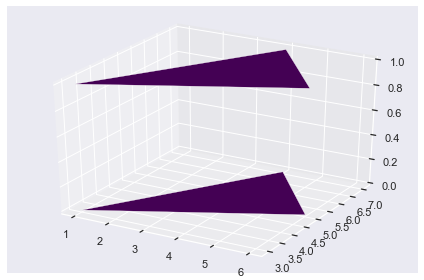

In [26]:
fig = plt.figure() # For plotting
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(p[:,0], p[:,1], p[:,2],cmap='viridis', linewidth=0.3)
ax.plot_trisurf(t[:,0], t[:,1], t[:,2],cmap='viridis', linewidth=0.3)

#ax.view_init(elev=0, azim=100)
fig.tight_layout()

In [27]:
hull.simplices

array([[ 3,  8, 30],
       [ 3, 30, 27],
       [26, 19,  8],
       [26, 19, 10],
       [26,  3,  8],
       [26,  3,  1],
       [13, 26,  1],
       [13, 26, 10],
       [23, 28, 27],
       [23, 30, 27],
       [18,  3,  1],
       [18,  3, 27],
       [17, 23, 30],
       [17, 23, 22],
       [17,  8, 30],
       [17, 19,  8],
       [20, 19, 10],
       [20, 10, 16],
       [20, 17, 22],
       [20, 17, 19],
       [ 4, 13, 10],
       [ 4, 10, 16],
       [ 4, 13,  1],
       [ 4,  1,  5],
       [12, 20, 16],
       [12, 20, 22],
       [12,  4, 16],
       [12,  4,  6],
       [25, 23, 28],
       [25, 23, 22],
       [25, 12, 22],
       [25, 12,  6],
       [ 7, 28, 27],
       [ 7, 18, 27],
       [ 7, 25, 28],
       [ 7, 25,  6],
       [ 7, 18,  1],
       [ 7,  1,  5],
       [ 7,  4,  5],
       [ 7,  4,  6]], dtype=int32)

In [40]:
def hyp(simplices,points):
    
    e = [ppp(f3,i)*1 for i in range(simplices.shape[0])]
    c=0
    for s in simplices:
        p = list(s)
        p.append(s[0])
        #if a[c]==0:
        #if d[c]==1:
        if e[c]==1:
            for k in range(3):
                x=[points[p[k]][0],points[p[k+1]][0]]
                y=[points[p[k]][1],points[p[k+1]][1]]
                plt.plot(x,y,marker = 'o')
        c+=1
    plt.xlim(-2,2.5)
    plt.ylim(-2,2.5)
    plt.show()
        

In [41]:
def ppp(f,i):
    l = np.zeros((f.shape[0]+1,f.shape[1]))
    a = ConvexHull(f)
    b = f[a.simplices[i]]
    c = np.mean(b,axis=0)
    d = np.cross(b[1]-b[0],b[2]-b[0])
    
    for k in range(f.shape[0]):
        l[k]=f[k]
    l[-1]=c + 0.001*d
    
    e = ConvexHull(l)
    g = f.shape[0] in list(e.vertices)
    gg = d[2]>0
    
    if gg + g ==2 or gg+g == 0:
        return True
    return False

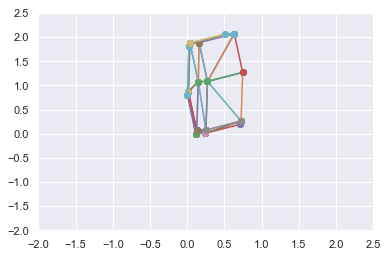

In [42]:
hyp(hull.simplices,f3)


In [43]:
hull.simplices.shape

(40, 3)

In [44]:
FF = list(set(map(tuple,  Mink(clean(G2)))))
g3 = np.zeros((len(FF),3))
for i in range(len(FF)):
    g3[i,0]=FF[i][0]
    g3[i,1]=FF[i][1]
    g3[i,2]=FF[i][2]
g3,g3.shape

2 t
loop 2
4 t
loop 2
8 t
loop 2
16 t
loop 2
32 32


(array([[ 0.48724468,  1.05803233, -0.53058827],
        [ 0.03574587,  1.87765637, -0.25405153],
        [ 0.62150979,  1.26211312, -0.0597564 ],
        [ 0.01433895,  0.87109603, -0.49179017],
        [ 0.6321684 ,  2.07068557, -0.27189133],
        [ 0.5086516 ,  2.06459267, -0.29284963],
        [ 0.61782945,  2.00206909, -0.44593198],
        [ 0.49431265,  1.99597619, -0.46689028],
        [ 0.12719714,  0.06861648, -0.25869694],
        [ 0.1235168 ,  0.80857245, -0.64487252],
        [ 0.27212086,  1.08126972, -0.        ],
        [ 0.25778191,  1.01265324, -0.17404065],
        [ 0.73068764,  1.19958954, -0.21283875],
        [ 0.15926267,  1.88374927, -0.23309323],
        [ 0.14492372,  1.81513279, -0.40713388],
        [ 0.61076148,  1.06412523, -0.50962997],
        [ 0.74502659,  1.26820602, -0.0387981 ],
        [ 0.23637499,  0.0060929 , -0.41177929],
        [ 0.02140692,  1.80903989, -0.42809218],
        [ 0.25071394,  0.07470938, -0.23773864],
        [ 0.72361967

In [45]:
FF = list(set(map(tuple,  Mink(clean(H2)))))
h3 = np.zeros((len(FF),3))
for i in range(len(FF)):
    h3[i,0]=FF[i][0]
    h3[i,1]=FF[i][1]
    h3[i,2]=FF[i][2]
h3,h3.shape

1 t
loop 1
1 t
loop 1
1 t
loop 1
1 1


(array([[ 0.27212086,  1.08126972, -0.        ]]), (1, 3))

In [54]:
g3g = ConvexHull(g3)

In [57]:
import mpl_toolkits.mplot3d as a3

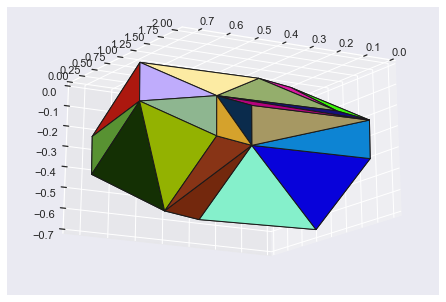

In [59]:
import matplotlib.colors as colors
import pylab as pl
import scipy as sp

min_=np.min(f3,axis=0)
max_=np.max(f3,axis=0)
ax = a3.Axes3D(pl.figure())
for s in hull.simplices:
    p2 = f3[s]
    tri = a3.art3d.Poly3DCollection([p2])
    tri.set_color(colors.rgb2hex(sp.rand(3)))
    tri.set_edgecolor('k')
    ax.add_collection3d(tri)
ax.set_xlim3d(min_[0], max_[0])
ax.set_ylim3d(min_[1],max_[1])
ax.set_zlim3d(min_[2],max_[2])
ax.view_init(elev=-20, azim=60)
pl.show()

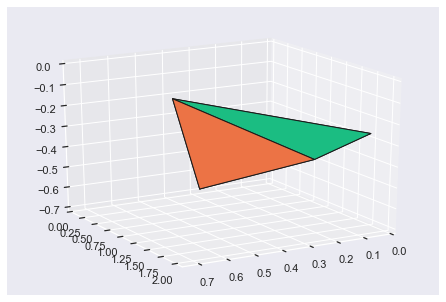

In [60]:
import matplotlib.colors as colors
import pylab as pl
import scipy as sp

min_=np.min(g3,axis=0)
max_=np.max(g3,axis=0)
ax = a3.Axes3D(pl.figure())

p2 = g3[np.array([0,1,2])]
tri = a3.art3d.Poly3DCollection([p2])
tri.set_color(colors.rgb2hex(sp.rand(3)))
tri.set_edgecolor('k')
ax.add_collection3d(tri)

p2 = g3[np.array([1,2,3])]
tri = a3.art3d.Poly3DCollection([p2])
tri.set_color(colors.rgb2hex(sp.rand(3)))
tri.set_edgecolor('k')
ax.add_collection3d(tri)

p2 = g3[np.array([2,3,0])]
tri = a3.art3d.Poly3DCollection([p2])
tri.set_color(colors.rgb2hex(sp.rand(3)))
tri.set_edgecolor('k')
ax.add_collection3d(tri)

p2 = g3[np.array([3,0,1])]
tri = a3.art3d.Poly3DCollection([p2])
tri.set_color(colors.rgb2hex(sp.rand(3)))
tri.set_edgecolor('k')
ax.add_collection3d(tri)

ax.set_xlim3d(min_[0], max_[0])
ax.set_ylim3d(min_[1],max_[1])
ax.set_zlim3d(min_[2],max_[2])
ax.view_init(elev=20, azim=60)
pl.show()